<a href="https://colab.research.google.com/github/charan6366/Disease-Prediction/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
training = pd.read_csv("/content/Training.csv")
training.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
training.drop('Unnamed: 133', axis=1, inplace=True)
training.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [6]:
len(training['prognosis'].value_counts())

41

In [7]:
training['prognosis'].value_counts()

Hepatitis E                                120
Varicose veins                             120
GERD                                       120
Osteoarthristis                            120
AIDS                                       120
Psoriasis                                  120
Hypoglycemia                               120
Dengue                                     120
Acne                                       120
Migraine                                   120
Hypothyroidism                             120
Peptic ulcer diseae                        120
Chronic cholestasis                        120
Typhoid                                    120
Tuberculosis                               120
Chicken pox                                120
Pneumonia                                  120
Hepatitis B                                120
Alcoholic hepatitis                        120
Malaria                                    120
Arthritis                                  120
Hyperthyroidi

In [8]:
for column in training.columns[:-1]:
    print("{} ({}) : {}".format(column, len(training[column].unique()), training[column].unique()))

itching (2) : [1 0]
skin_rash (2) : [1 0]
nodal_skin_eruptions (2) : [1 0]
continuous_sneezing (2) : [0 1]
shivering (2) : [0 1]
chills (2) : [0 1]
joint_pain (2) : [0 1]
stomach_pain (2) : [0 1]
acidity (2) : [0 1]
ulcers_on_tongue (2) : [0 1]
muscle_wasting (2) : [0 1]
vomiting (2) : [0 1]
burning_micturition (2) : [0 1]
spotting_ urination (2) : [0 1]
fatigue (2) : [0 1]
weight_gain (2) : [0 1]
anxiety (2) : [0 1]
cold_hands_and_feets (2) : [0 1]
mood_swings (2) : [0 1]
weight_loss (2) : [0 1]
restlessness (2) : [0 1]
lethargy (2) : [0 1]
patches_in_throat (2) : [0 1]
irregular_sugar_level (2) : [0 1]
cough (2) : [0 1]
high_fever (2) : [0 1]
sunken_eyes (2) : [0 1]
breathlessness (2) : [0 1]
sweating (2) : [0 1]
dehydration (2) : [0 1]
indigestion (2) : [0 1]
headache (2) : [0 1]
yellowish_skin (2) : [0 1]
dark_urine (2) : [0 1]
nausea (2) : [0 1]
loss_of_appetite (2) : [0 1]
pain_behind_the_eyes (2) : [0 1]
back_pain (2) : [0 1]
constipation (2) : [0 1]
abdominal_pain (2) : [0 1]
d

In [9]:
testing = pd.read_csv("/content/Testing.csv")
testing.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction


In [10]:
testing.shape

(42, 133)

In [11]:
len(testing['prognosis'].unique())

41

In [12]:
X_train = training.drop('prognosis', axis=1)
y_train = training['prognosis']
y_train = np.array(y_train).reshape(y_train.shape[0], 1)

X_test = testing.drop('prognosis', axis=1)
y_test = testing['prognosis']
y_test = np.array(y_test).reshape(y_test.shape[0], 1)

print("X_train : {} \ny_train : {} \nX_test: {} \ny_test : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train : (4920, 132) 
y_train : (4920, 1) 
X_test: (42, 132) 
y_test : (42, 1)


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [14]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

pred = tree.predict(X_test)
acc = tree.score(X_test, y_test)

print("Acurray on test set: {:.2f}%".format(acc*100))

Acurray on test set: 97.62%


In [15]:
np.ravel(y_test[:10])

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma'], dtype=object)

In [16]:
np.ravel(pred[:10])

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma'], dtype=object)

In [17]:
print(classification_report(y_test, pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [18]:
fi = pd.DataFrame(tree.feature_importances_*100, X_train.columns, columns=['Importance'])
fi.sort_values(by='Importance',ascending=False, inplace=True)
fi

,Importance
fatigue,2.707707
dizziness,2.567886
enlarged_thyroid,2.500000
muscle_pain,2.500000
pain_behind_the_eyes,2.500000
...,...
swollen_blood_vessels,0.000000
swollen_legs,0.000000
skin_rash,0.000000
cramps,0.000000


In [19]:
zeros = np.array(fi[fi['Importance'] == 0.000000].index)
zeros

array(['belly_pain', 'weight_gain', 'blister', 'continuous_sneezing',
       'anxiety', 'irritability', 'depression', 'cold_hands_and_feets',
       'toxic_look_(typhos)', 'burning_micturition',
       'small_dents_in_nails', 'increased_appetite',
       'prominent_veins_on_calf', 'silver_like_dusting', 'rusty_sputum',
       'muscle_wasting', 'ulcers_on_tongue',
       'receiving_blood_transfusion', 'mood_swings', 'scurring',
       'stomach_bleeding', 'distention_of_abdomen', 'joint_pain',
       'fluid_overload.1', 'shivering', 'foul_smell_of urine',
       'stiff_neck', 'loss_of_smell', 'malaise', 'sunken_eyes',
       'weakness_in_limbs', 'congestion', 'runny_nose', 'sinus_pressure',
       'redness_of_eyes', 'phlegm', 'blurred_and_distorted_vision',
       'swelled_lymph_nodes', 'weakness_of_one_body_side',
       'fluid_overload', 'acute_liver_failure', 'yellow_urine',
       'dehydration', 'abdominal_pain', 'constipation', 'back_pain',
       'nausea', 'pain_in_anal_region', 'c

In [20]:
zeros.shape

(69,)

In [21]:
print("Count of Features have 0% importance: {}".format(len(zeros)))

Count of Features have 0% importance: 69


**Using Neural Network**

In [22]:
training_new = training.drop(columns=zeros, axis=1)
training_new.shape[1]

64

In [23]:
testing_new = testing.drop(columns=zeros, axis=1)
testing_new.shape[1]

64

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [25]:
X_train_new = training_new.drop('prognosis', axis=1)
y_train_new = training['prognosis']

X_test_new = testing_new.drop('prognosis', axis=1)
y_test_new = testing['prognosis']

In [26]:
print("X_train_new : {} \ny_train_new : {} \nX_test_new: {} \ny_test_new : {}".format(X_train_new.shape, y_train_new.shape, X_test_new.shape, y_test_new.shape))


X_train_new : (4920, 63) 
y_train_new : (4920,) 
X_test_new: (42, 63) 
y_test_new : (42,)


In [27]:
y_train_enc = pd.get_dummies(y_train_new)
y_test_enc = pd.get_dummies(y_test_new)
y_train_enc.head(10)

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,Common Cold,Dengue,Diabetes,Dimorphic hemmorhoids(piles),Drug Reaction,Fungal infection,GERD,Gastroenteritis,Heart attack,Hepatitis B,Hepatitis C,Hepatitis D,Hepatitis E,Hypertension,Hyperthyroidism,Hypoglycemia,Hypothyroidism,Impetigo,Jaundice,Malaria,Migraine,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
model = Sequential()
model.add(Dense(32, input_dim=X_train_new.shape[1]))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(y_train_enc.shape[1]))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2048      
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 41)                697       
_________________________________________________________________
activation_2 (Activation)    (None, 41)                0         
Total params: 3,273
Trainable params: 3,273
Non-trainable params: 0
______________________________________________________

In [29]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')

In [30]:
history = model.fit(X_train_new, y_train_enc, batch_size=120, epochs=30, validation_split=0.3)

Epoch 1/30
29/29 [==============================] - 1s 16ms/step - loss: 0.6706 - accuracy: 0.0415 - val_loss: 0.6267 - val_accuracy: 0.0488
Epoch 2/30
29/29 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.0290 - val_loss: 0.4493 - val_accuracy: 0.0244
Epoch 3/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.0061 - val_loss: 0.2266 - val_accuracy: 0.0000e+00
Epoch 4/30
29/29 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.0000e+00 - val_loss: 0.1462 - val_accuracy: 0.0000e+00
Epoch 5/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1405 - accuracy: 0.0000e+00 - val_loss: 0.1304 - val_accuracy: 0.0000e+00
Epoch 6/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1287 - accuracy: 0.0000e+00 - val_loss: 0.1224 - val_accuracy: 0.0000e+00
Epoch 7/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1219 - accuracy: 0.0064 - val_loss: 0.1166 - val_accuracy

Visualisation

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

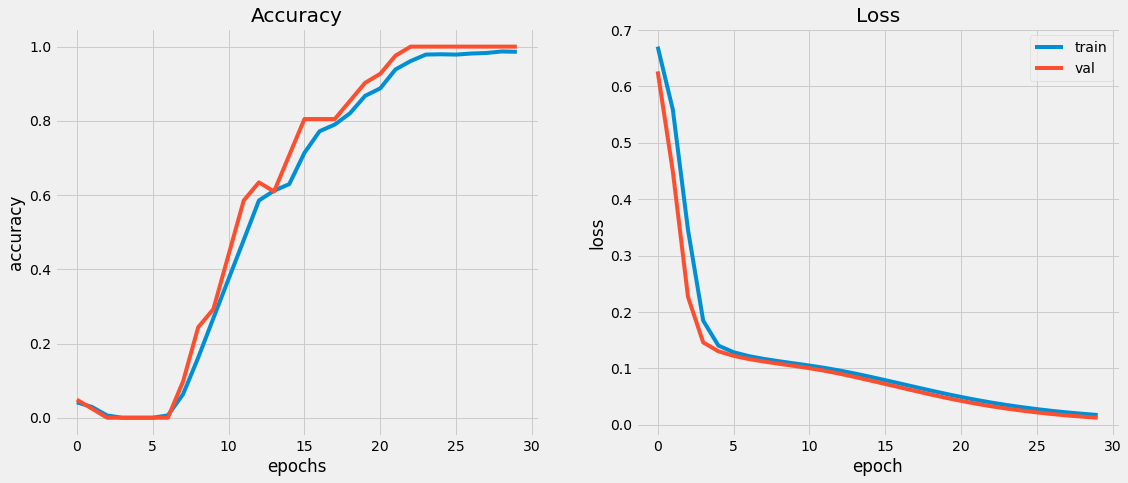

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epochs')
plt.legend(['train', 'val'], loc='lower right')
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')


In [33]:
score = model.evaluate(X_test_new, y_test_enc, steps=5, batch_size=1, verbose=1)

print('Loss: ', score[0])
print('Accuracy: ', score[1]*100)


5/5 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 1.0000
Loss:  0.01414976455271244
Accuracy:  100.0
